In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer 
import pickle 

In [4]:
df= pd.read_csv("emails.csv.zip")
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


# 0==ham   1==spam

In [5]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
df[df['spam']==1]

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [20]:
df.info
#df["spam"].dtype

<bound method DataFrame.info of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]>

In [9]:
x=df['text']
y=df['spam']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,train_size=0.8)

In [10]:
print(y_train.shape)
print(x_train.shape)
print("\n",x)
print("\ntrain data is",x_train)

(4582,)
(4582,)

 0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object

train data is 2156    Subject: re : efa meetings  hey vince ,  thank...
2879    Subject: latest draft - - comments ?  vince , ...
5233    Subject: entouch newsletter  business highligh...
652     Subject: viagra is the # 1 med to struggle wit...
417     Subject: re [ 1 ]  death penalty it ' s o . k ...

In [11]:
vectorize=TfidfVectorizer()
x_train_matrix= vectorize.fit_transform(x_train)
x_test_matrix= vectorize.transform(x_test)


In [12]:
print(x_train_matrix.shape)
print("\ny_train is",y_train)

(4582, 33719)

y_train is 2156    0
2879    0
5233    0
652     1
417     1
       ..
3671    0
709     1
2487    0
174     1
1146    1
Name: spam, Length: 4582, dtype: int64


In [13]:
classification= LogisticRegression()
classification.fit(x_train_matrix,y_train)
y_pred=classification.predict(x_train_matrix)
print(y_pred)

[0 0 0 ... 0 1 1]


In [14]:
accuracy_score(y_train,y_pred)

0.9954168485377565

In [15]:
print(y_test.shape)
print(x_test_matrix.shape)

(1146,)
(1146, 33719)


In [22]:
y_pred2=classification.predict(x_test_matrix)
accuracy_score(y_test,y_pred2)

0.981675392670157

([<matplotlib.axis.YTick at 0x1ea8407e900>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

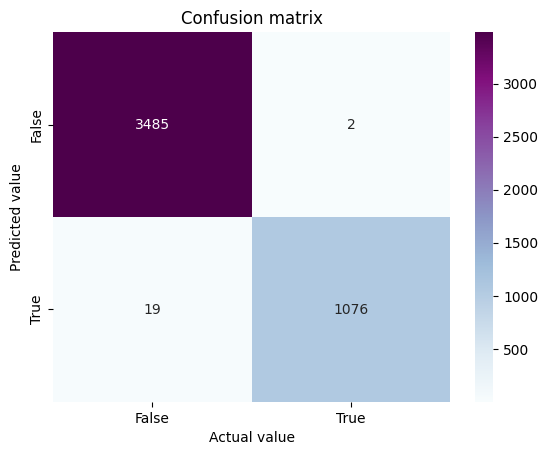

In [40]:
conf= confusion_matrix(y_train,y_pred)
sns.heatmap(conf,annot=True,fmt='d',cmap="BuPu")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Confusion matrix")
plt.xticks([0.5,1.5],['False','True'])
plt.yticks([0.5,1.5],['False','True'])

In [42]:
clf= classification_report(y_train,y_pred)
clf

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      3487\n           1       1.00      0.98      0.99      1095\n\n    accuracy                           1.00      4582\n   macro avg       1.00      0.99      0.99      4582\nweighted avg       1.00      1.00      1.00      4582\n'

# CONVERT IN PICKLE FILE

In [54]:
pickle.dump(classification,open('regmode.pkl','wb'))
pkl_model= pickle.load(open('regmode.pkl','rb'))

In [66]:
txt_mail=["hello deepak you have an emergy in office came fast"]
input_txt= vectorize.transform(txt_mail)
prediction=pkl_model.predict(input_txt)
print(prediction)
if(prediction==1):
    print("spam")
else:
    print("ham")


[0]
ham
